## Pitch Distribution Based Culture-Specific Mode Recognition

#### This notebook is a demonstration for how to use this repository created by Furkan Yesiler.

#### There are 5 steps in this demonstration:

1 - Downloading Turkish Makam Recognition Dataset

2 - Computing Pitch Distributions of Recordings

3 - Computing Hierarchical Clusters of Modes Based on Pitch Distribution Templates

4 - Plotting Average Pitch Distributions of Two Modes

5 - Automatic Mode Classification Using One-Hidden-Layer MLP model

#### 1 - Downloading the Turkish Makam Recognition Dataset

The dataset used in the experiments consists of 50 recordings each from 20 makams. The annotations file (annotations.json) include MusicBrainz ID (MBID), makam and annotated tonic frequency for each recording. The dataset also includes files that have already extracted pitch values. 

In [1]:
!python3 downloadmakamdataset.py -h

usage: downloadmakamdataset.py [-h] [-d DIRECTORY]

Downloads OTMM Makam Recognition Dataset from
https://github.com/MTG/otmm_makam_recognition_dataset/

optional arguments:
  -h, --help            show this help message and exit
  -d DIRECTORY, --directory DIRECTORY
                        Target directory for the downloaded files.Type is
                        string. Default is data/.


In [2]:
%run -i 'downloadmakamdataset.py' -d data/

Data downloaded and unzipped to:  data/otmm_makam_recognition_dataset-dlfm2016


#### 2 - Computing Pitch Distributions

The following part is to compute pitch distributions of recordings. 

To use the mode information specified in annotations file, annot should be 1.

To use the already extracted pitch values from the directory, pitch_files should be 1. 

To use the already estimated tonic frequencies included in annotations file, annot_tonic should be 1. 

For the required folder structure, README file can be referred.

In [3]:
!python3 computepitchdistribution.py -h

usage: computepitchdistribution.py [-h] [-n NUMBER_OF_BINS] [-f {0,1}]
                                   [-p PCT] [-a {0,1}] [-pf {0,1}] [-t {0,1}]
                                   [-d FOLDER_DIR] [-fs FEATURES_SAVE_NAME]
                                   [-cs CLASSES_SAVE_NAME]

This method computes pitch distributions of target recordings and aligns the
obtained distributions with respect to the tonic frequency. The obtained
distributions are saved as a csv file. To use the mode information specified
in annotations file, annot should be 1. To use the already extracted pitch
values from the directory, pitch_files should be 1. To use the already
estimated tonic frequencies included in annotations file, annot_tonic should
be 1. For the required folder structure, README file can be referred.

optional arguments:
  -h, --help            show this help message and exit
  -n NUMBER_OF_BINS, --number_of_bins NUMBER_OF_BINS
                        Number of comma values to divide between 

In [4]:
%run -i 'computepitchdistribution.py'

Files 1-50 are being processed
Files 51-100 are being processed
Files 101-150 are being processed
Files 151-200 are being processed
Files 201-250 are being processed
Files 251-300 are being processed
Files 301-350 are being processed
Files 351-400 are being processed
Files 401-450 are being processed
Files 451-500 are being processed
Files 501-550 are being processed
Files 551-600 are being processed
Files 601-650 are being processed
Files 651-700 are being processed
Files 701-750 are being processed
Files 751-800 are being processed
Files 801-850 are being processed
Files 851-900 are being processed
Files 901-950 are being processed
Files 951-1000 are being processed
Csv files are created!


#### 3 - Computing Hierarchical Clusters of Modes Based on Pitch Distribution Templates

The following part is to form hierarchical clusters and to plot the results as a dendrogram.

In [7]:
!python3 computedendrogram.py -h

usage: computedendrogram.py [-h] [-f FEATURES_CSV] [-c CLASSES_CSV]
                            [-d DISTANCE_FUNC] [-n NUMBER_OF_BINS]

This method computes the distances between average pitch distributions of
modes and forms hierarchical clusters based on distances of pitch distribution
templates

optional arguments:
  -h, --help            show this help message and exit
  -f FEATURES_CSV, --features_csv FEATURES_CSV
                        Name of the csv file containing feature values of
                        instances. Type is string. Default is
                        feature_values.csv
  -c CLASSES_CSV, --classes_csv CLASSES_CSV
                        Name of the csv file containing class values of
                        instances. Type is string. Default is class_values.csv
  -d DISTANCE_FUNC, --distance_func DISTANCE_FUNC
                        Distance function to use. Type is string. Default is
                        canberra.
  -n NUMBER_OF_BINS, --number_of_bins NUMB

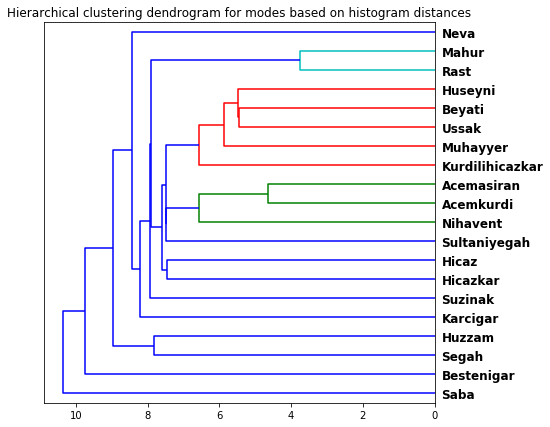

In [6]:
%run -i 'computedendrogram.py'

#### 4 - Plotting Average Pitch Distributions of Two Modes

The following part is to plot average pitch distributions of two modes

In [5]:
!python3 comparetwomodes.py -h

usage: comparetwomodes.py [-h] -fm FIRST_MODE -sm SECOND_MODE
                          [-n NUMBER_OF_BINS] [-f {0,1}] [-fn FEATURES_CSV]
                          [-cn CLASSES_CSV]

This method plots the average pitch histograms of given modes in order to
compare them

optional arguments:
  -h, --help            show this help message and exit
  -fm FIRST_MODE, --first_mode FIRST_MODE
                        Target directory for the downloaded files.Type is
                        string.
  -sm SECOND_MODE, --second_mode SECOND_MODE
                        Target directory for the downloaded files.Type is
                        string.
  -n NUMBER_OF_BINS, --number_of_bins NUMBER_OF_BINS
                        Number of comma values to divide between 0 and 1200
                        cent. Type is integer. Default is 53.
  -f {0,1}, --first_last_pct {0,1}
                        If 1, use the first and the last sections. If 0, only
                        the entire recording. Defa

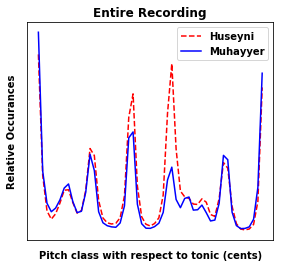

In [6]:
%run -i 'comparetwomodes.py' -fm Huseyni -sm Muhayyer -f 0

#### 5 - Automatic Mode Classification Using One-Hidden-Layer MLP model

The following part is used to perform automatic mode classification. 

To use an existing model and predict the modes of the instances in features_csv file, use_model should be 1. 

To perform cross validation and hyperparameter optimization with the given lists of parameters,
use_model should be 0 and hyperparameter_opt should be 1. 

To divide the dataset into training and test subsets without cross validation, use_model and
hyperparameter_opt should be 0. For this case, the first element of the
lists of parameters will be considered for the MLP model.

In [6]:
!python3 automaticclassification.py -h

usage: automaticclassification.py [-h] [-u {0,1}] [-hpt {0,1}]
                                  [-f FEATURES_CSV] [-c CLASSES_CSV]
                                  [-hl [HIDDEN_LAYERS [HIDDEN_LAYERS ...]]]
                                  [-a [ALPHAS [ALPHAS ...]]]
                                  [-lr [LEARNING_RATES [LEARNING_RATES ...]]]
                                  [-m [MOMENTA [MOMENTA ...]]] [-i ITERATIONS]
                                  [-mn MODEL_NAME]

This method performs automatic classification with one-hidden-layer MLP model.
features_csv should contain pitch distributions and be formatted as each row
is an instance, e.g. a recording, and each column is the respective bin of the
distribution. classes_csv should contain mode information as each row is the
mode of an instance. To use an existing model and predict the modes of the
instances in features_csv file, use_model should be 1. To perform cross
validation and hyperparameter tuning with the given lists of pa

Hyperparameter combination 1 is being performed for hyperparameter tuning.
Hyperparameter combination 2 is being performed for hyperparameter tuning.
Hyperparameter combination 3 is being performed for hyperparameter tuning.
Hyperparameter combination 4 is being performed for hyperparameter tuning.
Hyperparameter combination 5 is being performed for hyperparameter tuning.
Hyperparameter combination 6 is being performed for hyperparameter tuning.
Hyperparameter combination 7 is being performed for hyperparameter tuning.
Hyperparameter combination 8 is being performed for hyperparameter tuning.
Hyperparameter combination 9 is being performed for hyperparameter tuning.
Hyperparameter combination 10 is being performed for hyperparameter tuning.
Hyperparameter combination 11 is being performed for hyperparameter tuning.
Hyperparameter combination 12 is being performed for hyperparameter tuning.
Hyperparameter combination 13 is being performed for hyperparameter tuning.
Hyperparameter combin

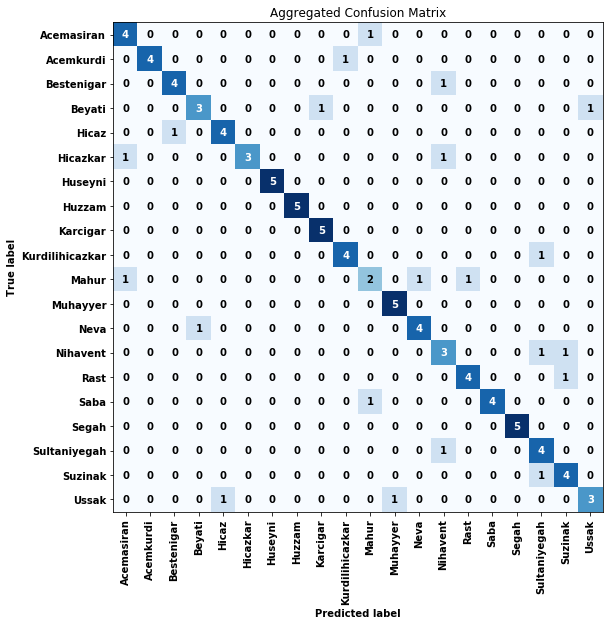

The mean accuracy score of 1 iterations: 79.0%


In [2]:
%matplotlib inline
%run -i 'automaticclassification.py' -hl 70 90 110 130 150 170 190 -lr 0.001 -m 0.5 -i 1